In [107]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline

---

Comparison between company and industry

In [108]:
# Hong Kong aviation industry constituent stock prices
stock_1055 = yf.download("1055.HK", start="2019-01-01", end="2024-03-31")
stock_0753 = yf.download("0753.HK", start="2019-01-01", end="2024-03-31")
stock_0293 = yf.download("0293.HK", start="2019-01-01", end="2024-03-31")
stock_0670 = yf.download("0670.HK", start="2019-01-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [109]:
# Preparing dataframe for the stock prices
df = pd.DataFrame(data={
    "stock_1055": stock_1055["Adj Close"],
    "stock_0753": stock_0753["Adj Close"],
    "stock_0293": stock_0293["Adj Close"],
    "stock_0670": stock_0670["Adj Close"],
})

df["Overall_trend"] = df.mean(axis=1)

*Average Trend*

Highest before covid:  8.759
Latest:  4.255
Percentage change: -51.421 %


Text(0, 0.5, 'Prices')

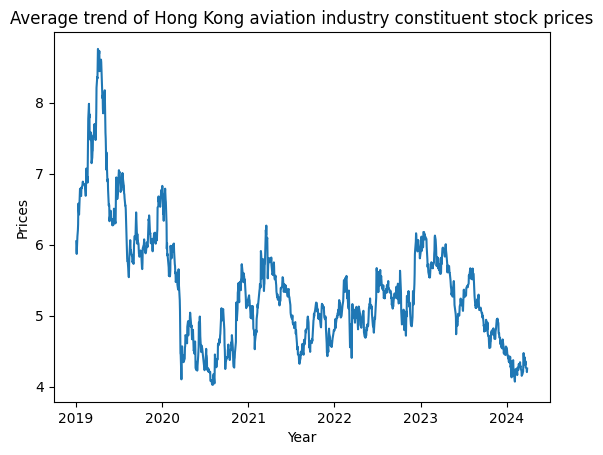

In [110]:
# Highest stock price values before covid
old = df["Overall_trend"].max()
print("Highest before covid: ", round(old,3))

# Lastest(up to the first-quarter) stock price values 
new = df.iloc[-1,-1]
print("Latest: ", round(new,3))

# % change
per_change = (new-old)/old*100
print("Percentage change:", round(per_change,3), "%")

# Visualization
plt.plot(df.index, df["Overall_trend"])
plt.title("Average trend of Hong Kong aviation industry constituent stock prices")
plt.xlabel("Year")
plt.ylabel("Prices")

*Cathay Pacific Trend*

Highest before covid:  11.335
Latest:  8.46
Percentage change: -25.363 %


Text(0, 0.5, 'Prices')

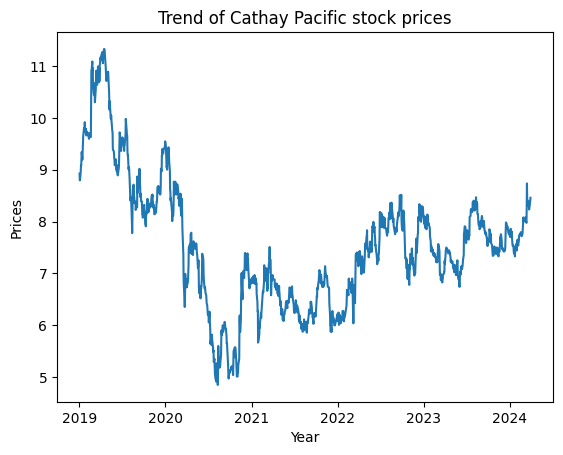

In [111]:
# Highest stock price values before covid
old = df["stock_0293"].max()
print("Highest before covid: ", round(old,3))

# Lastest(up to the first-quarter) stock price values 
new = df["stock_0293"].tail(1).values[0]
print("Latest: ", round(new,3))

# % change
per_change = (new-old)/old*100
print("Percentage change:", round(per_change,3), "%")

# Visualization
plt.plot(df.index, df["stock_0293"])
plt.title("Trend of Cathay Pacific stock prices")
plt.xlabel("Year")
plt.ylabel("Prices")

*Overall visualization*

Text(0, 0.5, 'Prices')

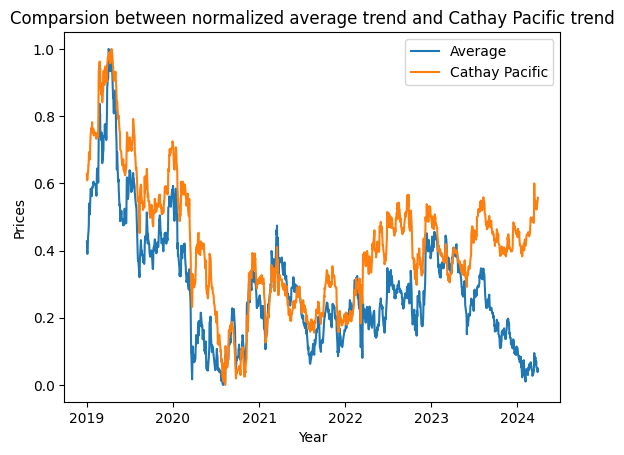

In [112]:
df2 = pd.DataFrame(data={
    "stock_0293_stand": (df["stock_0293"]-df["stock_0293"].min())/(df["stock_0293"].max()-df["stock_0293"].min()),
    "stock_average_stand": (df["Overall_trend"]-df["Overall_trend"].min())/(df["Overall_trend"].max()-df["Overall_trend"].min())
})

# Overall Visualization
plt.plot(df2.index, df2["stock_average_stand"], label="Average")
plt.plot(df2.index, df2["stock_0293_stand"], label="Cathay Pacific")
plt.title("Comparsion between normalized average trend and Cathay Pacific trend")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Prices")

---

Industry performances

In [113]:
# import the data from HKIA
df3 = pd.read_csv("Finalized Civil International Air Traffic Statistics at HKIA.csv")
df3.set_index(df3.columns[0], inplace=True)
df3.index = pd.to_datetime(df3.index, format='%m/%Y').strftime('%m/%Y')
df3

,Passengers,Cargo Handled
Unnamed: 0,,
03/2019,6420,432
06/2019,6347,387
09/2019,4857,406
12/2019,5716,443
03/2020,576,379
06/2020,59,358
09/2020,100,386
12/2020,91,439
03/2021,58,397


Text(0, 0.5, "unit ('000)")

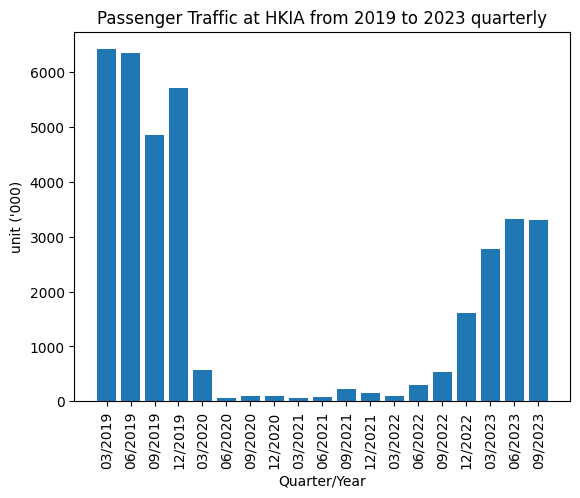

In [114]:
# visualize the number of passengers
plt.bar(df3.index, df3["Passengers"])
plt.xticks(rotation=90)
plt.title("Passenger Traffic at HKIA from 2019 to 2023 quarterly")
plt.xlabel("Quarter/Year")
plt.ylabel("unit ('000)")

Text(0, 0.5, "Tonnes ('000)")

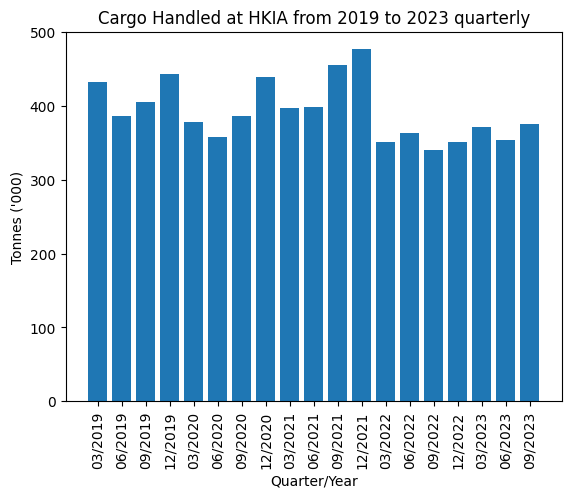

In [115]:
# visualize the cargo handled
plt.bar(df3.index, df3["Cargo Handled"])
plt.xticks(rotation=90)
plt.title("Cargo Handled at HKIA from 2019 to 2023 quarterly")
plt.xlabel("Quarter/Year")
plt.ylabel("Tonnes ('000)")